# Exercícios 

Escolha um dataset de sua preferência com as seguintes características: 

- Dado com um atributo rotulado (target)
- Pelo menos 4 variáveis númericas
- Pelo menos 1 variável categórica


1. Crie um pequeno texto de introdução ao seu dado. Explique a origem do dado e o tipo de problema que o entedimento deste pode proporcionar. No seu texto, tente responder as seguintes questões: 

- Qual a origem do meu dado?
    - Kaggle [Housing Price Prediction](https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data)
- Qual é o problema? 
    - Predizer o preço de uma casa
- Qual é a variável ALVO (target)? 
    - Preço
- Porque eu me importo?
    - Isso pode auxiliar compradores e vendedores a estimar o valor aproximado de uma casa em negociação, para analisar se está próximo a um valor justo ou ajudar a definir um preço justos.
- Quais os ganhos possíveis no entendimento do meu dado? 



2. Crie gráficos para estudar a dispersão numérica das variáveis numéricas (histogramas, boxplot, KDE, etc.)

3. Crie gráficos para estudar a frequencia dos valores possíveis observados nas variáveis categóricas (ex: barplots). 

4. Crie gráficos relacionais entre as variaveis numéricas, mas que explicite a variável ALVO do seu dado. 

5. Use o pandas profiling e gere um relatório automático. 




In [1]:
import pandas as pd

df=pd.read_csv('housing_price_dataset.csv')
# converte a coluna 'SquareFeet' para metros quadrados (1 pé quadrado = 0.092903 metros quadrados)
df['SquareMeter'] = df['SquareFeet']*0.092903
# converte a coluna 'Price' para real brasileiro (1 dólar = 5.5 reais) e arronde para 2 casas decimais
df['PriceBRL'] = df['Price']*5.5
df['PriceBRL'] = df['PriceBRL'].round(2)
df = df.drop(columns=['SquareFeet', 'Price'])
df.head()

,Bedrooms,Bathrooms,Neighborhood,YearBuilt,SquareMeter,PriceBRL
0,4,1,Rural,1969,197.511778,1184454.06
1,3,2,Rural,1980,228.448477,1072578.22
2,2,1,Suburb,1970,172.799580,1687900.57
3,2,1,Urban,1996,213.119482,1137327.33
4,5,2,Suburb,2001,197.883390,1498399.31


# 2. Crie gráficos para estudar a dispersão numérica das variáveis numéricas (histogramas, boxplot, KDE, etc.)

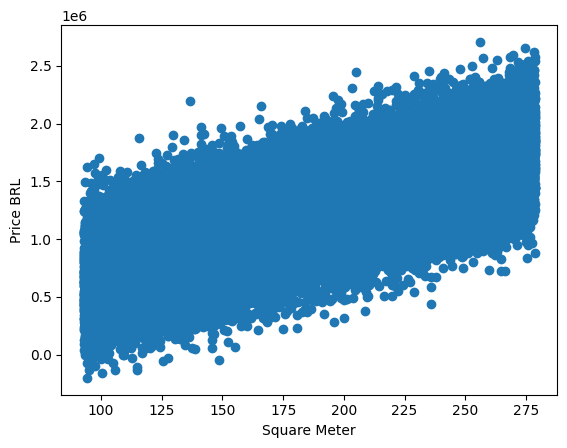

In [2]:
# cria grafico de dispersao
import matplotlib.pyplot as plt

plt.scatter(df['SquareMeter'], df['PriceBRL'])
plt.xlabel('Square Meter')
plt.ylabel('Price BRL')
plt.show()


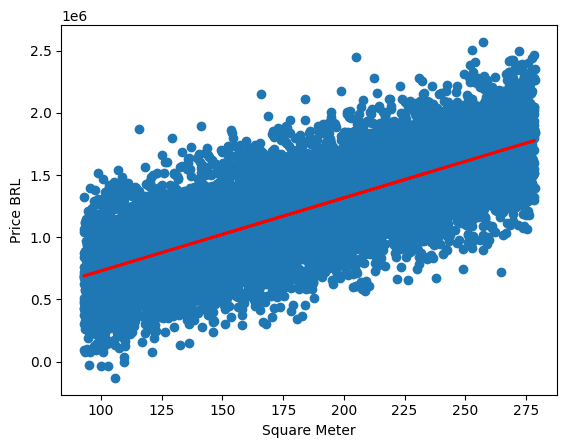

In [4]:

# cria modelo de regressao linear
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df['SquareMeter'].values.reshape(-1,1)
y = df['PriceBRL'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# cria grafico de dispersao com a linha de regressao
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Square Meter')
plt.ylabel('Price BRL')
plt.show()


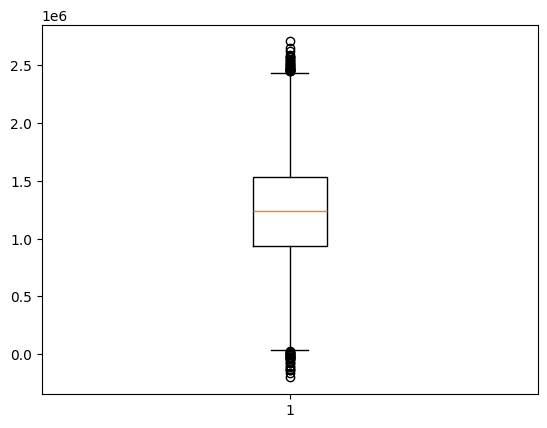

In [5]:
# crie um bloxplot para a coluna 'PriceBRL'
plt.boxplot(df['PriceBRL'])
plt.show()


# 3. Crie gráficos para estudar a frequencia dos valores possíveis observados nas variáveis categóricas (ex: barplots). 

# 4. Crie gráficos relacionais entre as variaveis numéricas, mas que explicite a variável ALVO do seu dado.

# 5. Use o pandas profiling e gere um relatório automático. 

In [3]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")

profile.to_file('output.html')

/Users/clairtonluz/projects/personal/MBA-em-ciencia-de-dados/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 400.79it/s]
